<a href="https://colab.research.google.com/github/HimaniBali/NIH_Dataset/blob/main/multi_classify_nih_chest_xray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Kaggle and setup
!pip install -q kaggle

# Create the Kaggle folder
!mkdir -p ~/.kaggle

# Upload your kaggle.json (click on file upload if it asks)
from google.colab import files
files.upload()

# Move kaggle.json into ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Set permissions
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [ ]:
# Download Chest X-ray Pneumonia Dataset
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

# Unzip it
!unzip -q chest-xray-pneumonia.zip


Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other


In [ ]:
import os

# Check folders
base_dir = '/content/chest_xray'

print("Folder structure:")
for folder in os.listdir(base_dir):
    print("-", folder)
    subfolder = os.path.join(base_dir, folder)
    if os.path.isdir(subfolder):
        print("  Files in", folder, ":", len(os.listdir(subfolder)))

# List normal and pneumonia classes
train_folder = os.path.join(base_dir, 'train')
print("\nTrain folder contains:")
print("Normal images:", len(os.listdir(os.path.join(train_folder, 'NORMAL'))))
print("Pneumonia images:", len(os.listdir(os.path.join(train_folder, 'PNEUMONIA'))))


Folder structure:
- train
  Files in train : 2
- chest_xray
  Files in chest_xray : 4
- __MACOSX
  Files in __MACOSX : 2
- val
  Files in val : 2
- test
  Files in test : 2

Train folder contains:
Normal images: 1341
Pneumonia images: 3875


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Set image parameters
img_width, img_height = 150, 150
batch_size = 32

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/chest_xray/train',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    '/content/chest_xray/val',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification: Normal or Pneumonia
])

# Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the CNN
history = model.fit(
    train_generator,
    epochs=10,   # We can change later based on time (start with 10)
    validation_data=val_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 67s 381ms/step - accuracy: 0.7526 - loss: 0.5396 - val_accuracy: 0.6875 - val_loss: 0.8322
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 61s 374ms/step - accuracy: 0.8918 - loss: 0.2589 - val_accuracy: 0.9375 - val_loss: 0.3732
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 61s 374ms/step - accuracy: 0.9005 - loss: 0.2457 - val_accuracy: 0.7500 - val_loss: 0.6394
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 61s 374ms/step - accuracy: 0.9185 - loss: 0.2142 - val_accuracy: 0.6875 - val_loss: 0.8132
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 61s 372ms/step - accuracy: 0.9288 - loss: 0.1771 - val_accuracy: 0.6250 - val_loss: 1.0370
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 61s 373ms/step - accuracy: 0.9221 - loss: 0.1925 - val_accuracy: 0.7500 - val_loss: 0.7758
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 61s 373ms/step - accuracy: 0.9388 - loss: 0.1701 - val_accuracy: 0.7500 - val_loss: 0.4765
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 61s 374ms/step - accuracy: 0.9406 - loss: 0

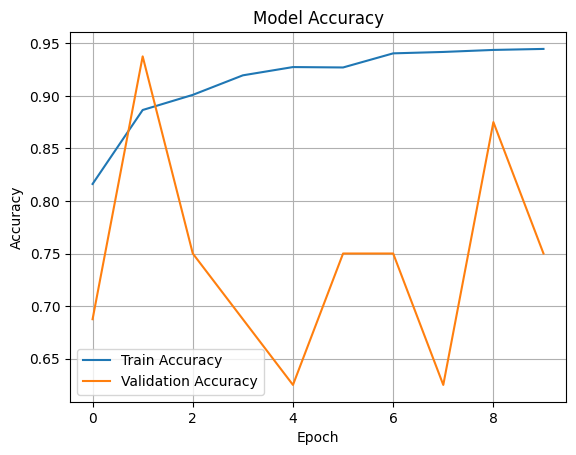

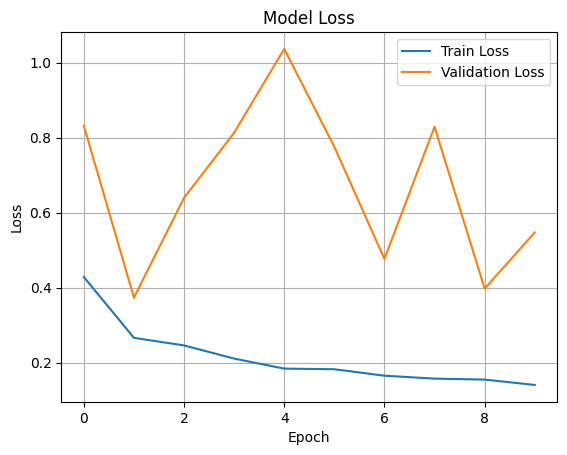

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define Test Generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'chest_xray/test',    # Make sure this matches your test set path
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 624 images belonging to 2 classes.


20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 194ms/step - accuracy: 0.8586 - loss: 0.4773
Test Accuracy: 90.71%
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 192ms/step


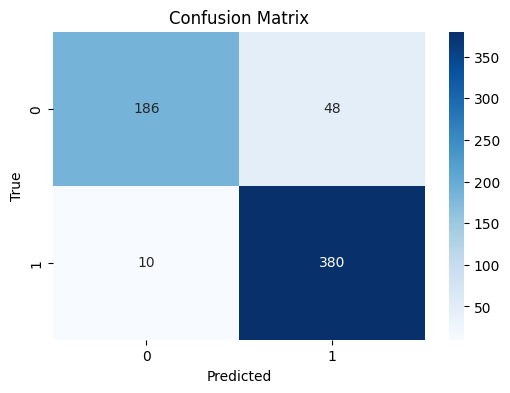


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.79      0.87       234
           1       0.89      0.97      0.93       390

    accuracy                           0.91       624
   macro avg       0.92      0.88      0.90       624
weighted avg       0.91      0.91      0.91       624



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

# Predict on Test Data
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy: {:.2f}%".format(test_acc * 100))

# Predict classes
Y_pred = model.predict(test_generator)
y_pred = np.round(Y_pred).astype(int)

# Confusion Matrix
cm = confusion_matrix(test_generator.classes, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(test_generator.classes, y_pred))
